<h1><strong>Convolutional Neural Network with the cifar10 Dataset</strong></h1>
<p>Samantha Fields-Samotowka</p>
<p>CISB-62</p>
<p>CRN 21058</p>
<p>October 22, 2023</p>

<h2>Explanation of Project</h2>
<p>I will be creating a basic convolutional neural network (CNN) using the cifar10 dataset. Then I will use Keras Tuner to tune it to hopefully achieve better results.</p>

<h2>Techniques Employed</h2>
<ul>
    <li>CNN</li>
    <li>Hyperparameter Tuning</li>
</ul>

<h3>Import Statements</h3>

In [1]:
#General libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#Keras and TensorFlow
import keras
import tensorflow as tf
from keras.utils import to_categorical

#cifar10 dataset
from keras.datasets import cifar10

#Model building libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

#Hyperparameter tuning
import os
import shutil
import keras_tuner as kt
from sklearn.metrics import mean_absolute_error

#Output visualisation and analysis
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

Using TensorFlow backend


<h1>Exploratory Data Analysis</h1>

<h3>Load data and examine</h3>

In [2]:
(X_train, y_train), (X_valid, y_valid) = cifar10.load_data()

In [3]:
#Reformatting for examination
X_train_df = pd.DataFrame(X_train.reshape(X_train.shape[0], -1))
y_train_df = pd.DataFrame(y_train, columns=["Label"])

X_valid_df = pd.DataFrame(X_valid.reshape(X_valid.shape[0], -1))
y_valid_df = pd.DataFrame(y_valid, columns=["Label"])

In [4]:
print("The shape of X_train is: ", X_train.shape)
print("The shape of y_train is: ", y_train.shape)
print("The shape of X_valid is: ", X_valid.shape)
print("The shape of y_valid is: ", y_valid.shape)

The shape of X_train is:  (50000, 32, 32, 3)
The shape of y_train is:  (50000, 1)
The shape of X_valid is:  (10000, 32, 32, 3)
The shape of y_valid is:  (10000, 1)


In [5]:
X_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,50000.000000,50000.00000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,130.710740,136.05614,132.553800,130.14036,135.442380,131.853580,131.050440,136.24616,132.581440,131.568860,...,113.877800,126.778360,125.697080,113.830580,126.564960,125.617420,113.906240,126.639080,125.850300,114.381860
std,73.412873,72.90798,80.449751,72.44259,71.901316,79.598048,72.240546,71.67471,79.434675,72.016555,...,64.738943,63.954763,61.591233,64.894603,64.178427,61.831646,65.212671,64.926283,62.649286,66.077526
min,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.000000,77.00000,61.000000,71.00000,78.000000,61.000000,73.000000,79.00000,62.000000,73.000000,...,64.000000,79.000000,81.000000,64.000000,79.000000,81.000000,64.000000,78.000000,80.000000,63.000000
50%,128.000000,135.00000,127.000000,127.00000,135.000000,127.000000,129.000000,136.00000,128.000000,130.000000,...,106.000000,124.000000,123.000000,106.000000,124.000000,123.000000,106.000000,124.000000,123.000000,106.000000
75%,189.000000,195.00000,207.000000,188.00000,193.000000,206.000000,188.000000,194.00000,206.000000,188.000000,...,157.000000,172.000000,167.000000,157.000000,172.000000,167.000000,157.000000,172.000000,168.000000,158.000000
max,255.000000,255.00000,255.000000,255.00000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [6]:
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,59,62,63,43,46,45,50,48,43,68,...,104,216,184,140,151,118,84,123,92,72
1,154,177,187,126,137,136,105,104,95,102,...,136,143,133,139,143,134,142,143,133,144
2,255,255,255,253,253,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,28,25,10,37,34,19,38,35,20,42,...,38,54,47,28,63,56,37,72,65,46
4,170,180,198,168,178,196,177,185,203,183,...,78,75,79,82,71,75,78,73,77,80


In [7]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3072 entries, 0 to 3071
dtypes: uint8(3072)
memory usage: 146.5 MB


In [8]:
y_train_df.describe()

,Label
count,50000.00000
mean,4.50000
std,2.87231
min,0.00000
25%,2.00000
50%,4.50000
75%,7.00000
max,9.00000


In [9]:
y_train_df.head()

,Label
0,6
1,9
2,9
3,4
4,1


In [10]:
y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Label   50000 non-null  uint8
dtypes: uint8(1)
memory usage: 49.0 KB


In [11]:
X_valid_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,130.535400,136.046200,132.830000,129.993900,135.511300,132.23110,131.145000,136.65770,133.233700,132.146800,...,114.760400,127.121400,126.143700,114.844100,126.517300,125.758800,114.776000,126.548300,126.002600,115.327100
std,73.333214,72.690423,80.134163,72.397388,71.740927,79.18629,72.288499,71.63948,79.172435,71.739001,...,64.333828,63.462211,60.866895,64.443142,63.784916,61.196315,64.911164,64.601056,62.021345,65.662591
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,78.000000,62.000000,71.000000,79.000000,62.00000,73.000000,80.00000,63.000000,75.000000,...,65.000000,79.000000,82.000000,65.000000,79.000000,81.000000,65.000000,78.000000,81.000000,65.000000
50%,127.000000,135.000000,128.000000,127.000000,135.000000,128.00000,128.000000,136.00000,129.000000,129.000000,...,107.000000,124.000000,123.000000,106.000000,123.000000,122.000000,106.000000,123.000000,123.000000,106.000000
75%,188.000000,195.000000,207.000000,187.000000,193.000000,205.00000,189.000000,195.00000,206.250000,190.000000,...,158.000000,172.000000,167.000000,158.000000,172.000000,167.000000,158.000000,171.000000,168.000000,160.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.00000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [12]:
X_valid_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,158,112,49,159,111,47,165,116,51,166,...,145,24,77,124,34,84,129,21,67,110
1,235,235,235,231,231,231,232,232,232,232,...,163,168,183,178,180,195,191,186,200,199
2,158,190,222,158,187,218,139,166,194,132,...,37,5,6,8,4,5,3,7,8,7
3,155,156,149,167,176,187,176,179,193,190,...,53,60,63,50,64,65,52,73,68,50
4,65,68,50,70,81,64,48,64,46,30,...,147,143,179,136,154,185,146,128,156,117


In [13]:
X_valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 3072 entries, 0 to 3071
dtypes: uint8(3072)
memory usage: 29.3 MB


In [14]:
y_valid_df.describe()

,Label
count,10000.000000
mean,4.500000
std,2.872425
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


In [15]:
y_valid_df.head()

,Label
0,3
1,8
2,8
3,0
4,6


In [16]:
y_valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Label   10000 non-null  uint8
dtypes: uint8(1)
memory usage: 9.9 KB


<h3>Visualization</h3>

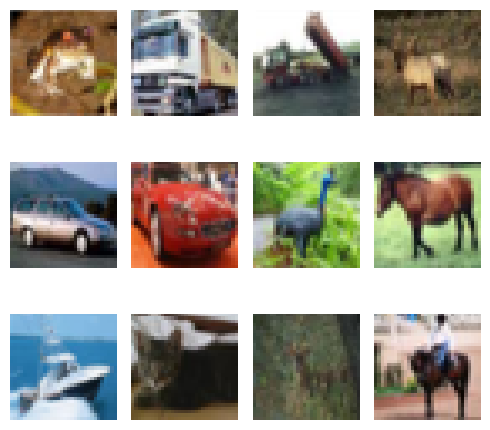

In [17]:
plt.figure(figsize=(5, 5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap="Greys")
    plt.axis("off")
plt.tight_layout()
plt.show()

<h3>Data Transformation</h3>

In [18]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
n_classes = 10

In [19]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [20]:
print(y_train[0])
print(f"A value of {y_train[0]} refers to the class of 'frog'.")

[6]
A value of [6] refers to the class of 'frog'.


In [21]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

X_train = X_train.astype("float32")
X_valid = X_valid.astype("float32")

X_train = X_train / 255
X_valid = X_valid / 255

<h1>Tuning Hyperparameters</h1>

<p>This is a basic model, with guesses and assumptions for hyperparameter values</p>

In [22]:
#Instatiate the model
model = Sequential()

#Input layer
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))

#Convolutional and Pooling layers
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

#Dense hidden layer
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(n_classes, activation="softmax"))

In [23]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                        

In [24]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["Accuracy"])

In [25]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/10
391/391 [==============================] - 43s 109ms/step - loss: 1.7031 - Accuracy: 0.3773 - val_loss: 1.3507 - val_Accuracy: 0.5368
Epoch 2/10
391/391 [==============================] - 40s 101ms/step - loss: 1.3700 - Accuracy: 0.5060 - val_loss: 1.1647 - val_Accuracy: 0.5946
Epoch 3/10
391/391 [==============================] - 39s 100ms/step - loss: 1.2284 - Accuracy: 0.5617 - val_loss: 1.0662 - val_Accuracy: 0.6287
Epoch 4/10
391/391 [==============================] - 40s 101ms/step - loss: 1.1491 - Accuracy: 0.5889 - val_loss: 1.0005 - val_Accuracy: 0.6523
Epoch 5/10
391/391 [==============================] - 39s 101ms/step - loss: 1.0991 - Accuracy: 0.6098 - val_loss: 1.0159 - val_Accuracy: 0.6493
Epoch 6/10
391/391 [==============================] - 40s 101ms/step - loss: 1.0489 - Accuracy: 0.6289 - val_loss: 0.9522 - val_Accuracy: 0.6675
Epoch 7/10
391/391 [==============================] - 39s 101ms/step - loss: 1.0002 - Accuracy: 0.6443 - val_loss: 0.9290 - val_Ac

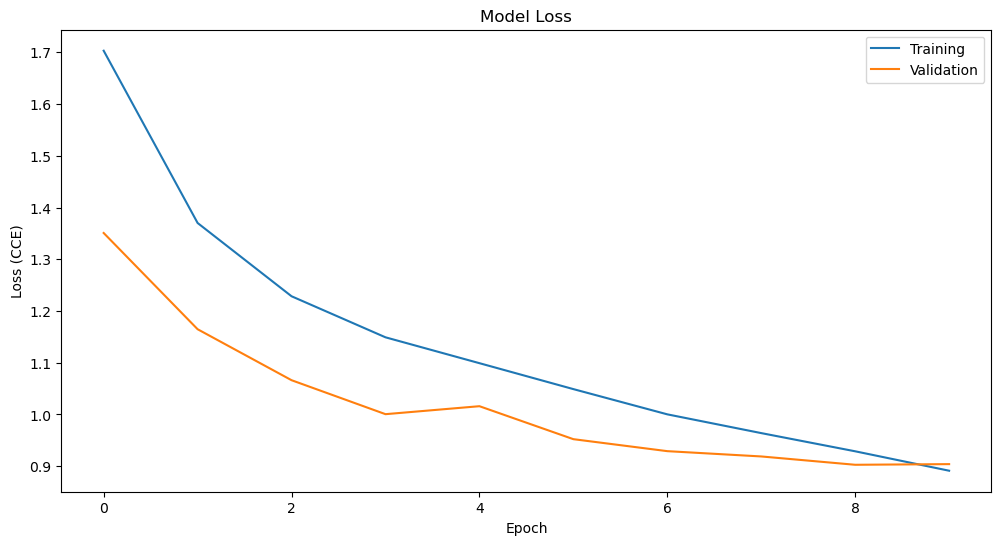

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(model.history.history["loss"][:])
plt.plot(model.history.history["val_loss"][:])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (CCE)")
plt.legend(["Training", "Validation"], loc="upper right")

In [27]:
basic_loss, basic_accuracy = model.evaluate(X_valid, y_valid)

313/313 [==============================] - 2s 7ms/step - loss: 0.9039 - Accuracy: 0.6800


In [28]:
print(f"The basic model's loss is: {basic_loss:.2f}")
print(f"The basic model's accuracy is: {basic_accuracy:.2f}")

The basic model's loss is: 0.90
The basic model's accuracy is: 0.68


<h1>Applying Deep Learning Techniques</h1>

<p>Hyperparameter tuning with Keras Tuner</p>

In [30]:
#Clearing existing data for previous trials
folder_path = "hyperparameter_tuning/CISB62_Midterm"

if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"The folder '{hyperparameter_tuning}' has been deleted.")
else:
    print(f"The folder '{folder_path}' does not exist.")

The folder 'hyperparameter_tuning/CISB62_Midterm' does not exist.


In [31]:
#Function to create a model
def model_builder(hp):
    model = Sequential()
    
    hp_filters = hp.Int("filters", min_value=4, max_value=20, step=4)
    
    #Input layer
    model.add(Conv2D(filters=hp_filters, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
    
    #Convolutional and Pooling layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    
    #Dense hidden layer
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.5))
    
    #Output layer
    model.add(Dense(n_classes, activation="softmax"))
    
    #Compiling the model
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return model

In [32]:
#Hyperparameter tuner
tuner = kt.Hyperband(model_builder, objective="val_accuracy", max_epochs=10, factor=3, directory="hyperparameter_tuning", project_name="CISB62_Midterm")

In [33]:
#Early stopping variable
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)

In [34]:
#Searching for optimal values: Filters
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"The hyperparameter search is complete. The optimal number of filters in the first dense layer is {best_hps.get('filters')}")

Trial 5 Complete [00h 01m 19s]
val_accuracy: 0.6191999912261963

Best val_accuracy So Far: 0.6191999912261963
Total elapsed time: 00h 09m 15s
The hyperparameter search is complete. The optimal number of filters in the first dense layer is 12


In [36]:
#Searching for optimal values: Epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

val_acc_per_epoch = history.history["val_accuracy"]
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1

print("Best epoch: %d" % (best_epoch,))

Epoch 1/20
1250/1250 [==============================] - 41s 32ms/step - loss: 1.6280 - accuracy: 0.4054 - val_loss: 1.2995 - val_accuracy: 0.5405
Epoch 2/20
1250/1250 [==============================] - 35s 28ms/step - loss: 1.3224 - accuracy: 0.5273 - val_loss: 1.1215 - val_accuracy: 0.6093
Epoch 3/20
1250/1250 [==============================] - 35s 28ms/step - loss: 1.1988 - accuracy: 0.5750 - val_loss: 1.0312 - val_accuracy: 0.6331
Epoch 4/20
1250/1250 [==============================] - 36s 29ms/step - loss: 1.1074 - accuracy: 0.6052 - val_loss: 0.9821 - val_accuracy: 0.6574
Epoch 5/20
1250/1250 [==============================] - 35s 28ms/step - loss: 1.0353 - accuracy: 0.6306 - val_loss: 0.9585 - val_accuracy: 0.6661
Epoch 6/20
1250/1250 [==============================] - 34s 27ms/step - loss: 0.9743 - accuracy: 0.6528 - val_loss: 0.9706 - val_accuracy: 0.6594
Epoch 7/20
1250/1250 [==============================] - 35s 28ms/step - loss: 0.9247 - accuracy: 0.6717 - val_loss: 0.9541 -

In [37]:
#Building a model using the optimal values
hypermodel = tuner.hypermodel.build(best_hps)
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 35s 28ms/step - loss: 1.6227 - accuracy: 0.4080 - val_loss: 1.2489 - val_accuracy: 0.5692
Epoch 2/20
1250/1250 [==============================] - 37s 29ms/step - loss: 1.3053 - accuracy: 0.5304 - val_loss: 1.0890 - val_accuracy: 0.6127
Epoch 3/20
1250/1250 [==============================] - 34s 27ms/step - loss: 1.1712 - accuracy: 0.5827 - val_loss: 1.0288 - val_accuracy: 0.6409
Epoch 4/20
1250/1250 [==============================] - 33s 27ms/step - loss: 1.0762 - accuracy: 0.6145 - val_loss: 1.0061 - val_accuracy: 0.6496
Epoch 5/20
1250/1250 [==============================] - 34s 27ms/step - loss: 1.0099 - accuracy: 0.6375 - val_loss: 0.9461 - val_accuracy: 0.6675
Epoch 6/20
1250/1250 [==============================] - 33s 27ms/step - loss: 0.9398 - accuracy: 0.6626 - val_loss: 0.9759 - val_accuracy: 0.6558
Epoch 7/20
1250/1250 [==============================] - 34s 27ms/step - loss: 0.8903 - accuracy: 0.6795 - val_loss: 0.9702 -

<p>Evaluating the hypermodel on test data.</p>

In [38]:
eval_result = hypermodel.evaluate(X_train, y_train)

print("[Test Loss, Test, Accuracy]:", eval_result)

1563/1563 [==============================] - 11s 7ms/step - loss: 0.3614 - accuracy: 0.9029
[Test Loss, Test, Accuracy]: [0.3613594174385071, 0.9028800129890442]


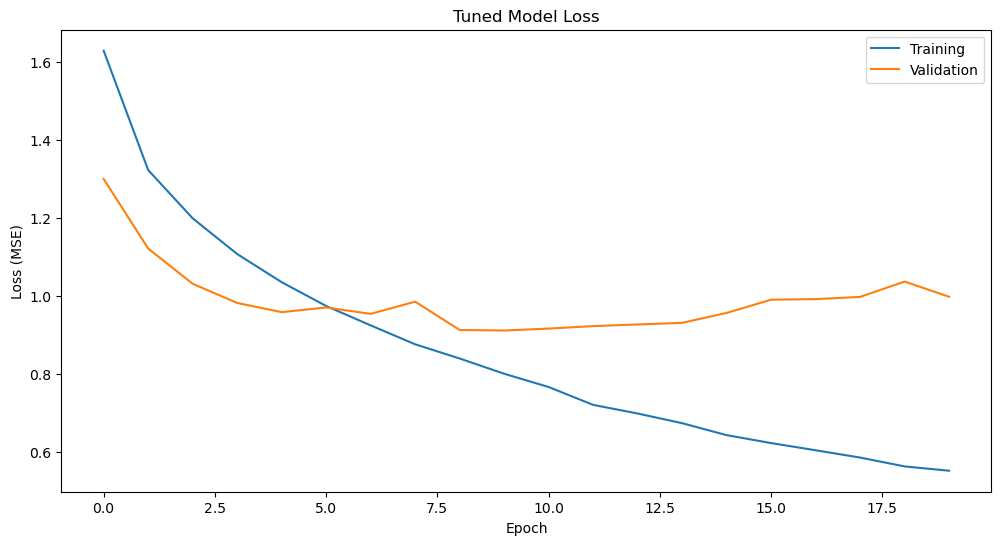

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(model.history.history["loss"][:])
plt.plot(model.history.history["val_loss"][:])
plt.title("Tuned Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend(["Training", "Validation"], loc="upper right")

In [40]:
y_pred = model.predict(X_valid)
mae = mean_absolute_error(y_valid, y_pred)

y_pred[0:5]

313/313 [==============================] - 2s 5ms/step


array([[2.16775061e-05, 1.01118516e-04, 9.30281414e-04, 9.42361116e-01,
        3.14277495e-05, 5.36066517e-02, 2.34575011e-03, 4.32498346e-04,
        1.29223074e-04, 4.01980833e-05],
       [8.62683926e-04, 2.69109309e-01, 4.57840918e-11, 2.02925459e-12,
        8.61710811e-16, 2.32569646e-15, 8.26927614e-16, 3.44548565e-19,
        7.29989409e-01, 3.85104613e-05],
       [1.30412787e-01, 1.71356648e-02, 2.59456516e-04, 1.97324829e-04,
        7.39778261e-05, 1.86343118e-06, 1.94123731e-06, 1.48028118e-06,
        8.50921214e-01, 9.94337723e-04],
       [7.32468784e-01, 1.01485327e-01, 1.00839057e-03, 4.64276563e-05,
        3.29479553e-05, 4.44122776e-07, 5.01559271e-06, 1.09159066e-06,
        1.39624804e-01, 2.53268443e-02],
       [2.84187198e-08, 2.82258810e-07, 5.00642927e-05, 3.88244420e-01,
        1.82053372e-02, 9.96706635e-03, 5.83532453e-01, 3.68916545e-07,
        1.03449060e-09, 2.14433946e-08]], dtype=float32)

In [41]:
print(f"The Mean Absolute Error is: {mae}")

The Mean Absolute Error is: 0.07360576093196869


<p>Comparing prediction values and actual values</p>

In [42]:
y_pred[42]

array([1.3196096e-05, 4.0640148e-06, 4.0570949e-04, 6.6787854e-02,
       6.7576630e-06, 9.2672271e-01, 1.8823856e-08, 6.0563381e-03,
       2.6731841e-09, 3.3439558e-06], dtype=float32)

In [43]:
model.predict(np.reshape(X_valid[42], [1, 14]))

ValueError: cannot reshape array of size 3072 into shape (1,14)

<h1>Summary and Conclusion</h1>

<h3>Summary</h3>

In [45]:
epoch_num = ["Basic Model Epochs", "Tuned Model Epochs"]
epoch_times = ["Basic Model Time", "Tuned Model Time"]
loss_value = ["Basic Model Loss", "Tuned Model Loss"]
accuracy_values = ["Basic Model Accuracy", "Tuned Model Accuracy"]

basic_epoch_num = 10

basic_epoch_times = np.array([43, 40, 39, 40, 39, 40, 39, 39, 40, 40])
basic_epoch_avg = np.mean(basic_epoch_times)

tuned_epoch_num = 20

tuned_epoch_times = np.array([35, 37, 34, 33, 34, 33, 34, 35, 36, 36, 35, 35, 33, 34, 36, 34, 35, 37, 37, 38])
tuned_epoch_avg = np.mean(tuned_epoch_times)

print(f"Basic Loss: {basic_loss:2f}")
print(f"Basic Accuracy: {basic_accuracy:2f}")

print("Tuned Loss", eval_result[0])
print("Tuned Accuracy", eval_result[1])

epochs = [basic_epoch_num, tuned_epoch_num]
times = [basic_epoch_avg, tuned_epoch_avg]
losses = [basic_loss, eval_result[0]]
accuracies = [basic_accuracy, eval_result[1]]

Basic Loss: 0.903936
Basic Accuracy: 0.680000
Tuned Loss 0.3613594174385071
Tuned Accuracy 0.9028800129890442


In [46]:
def plot_values(data_labels, data_points, ylabel, title):
    fig, ax = plt.subplots()
    ax.bar(data_labels, data_points)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.show()

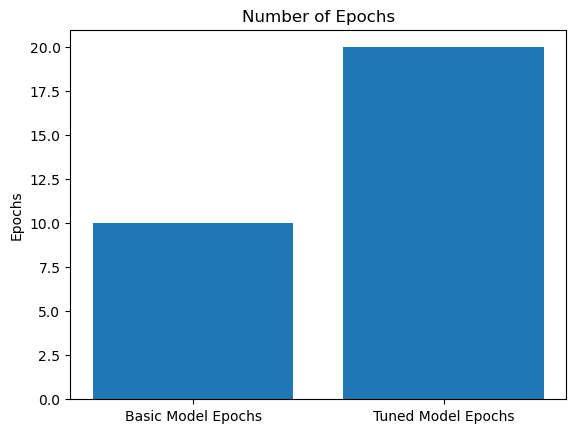

In [47]:
#Number of epochs
plot_values(epoch_num, epochs, ylabel="Epochs", title="Number of Epochs")

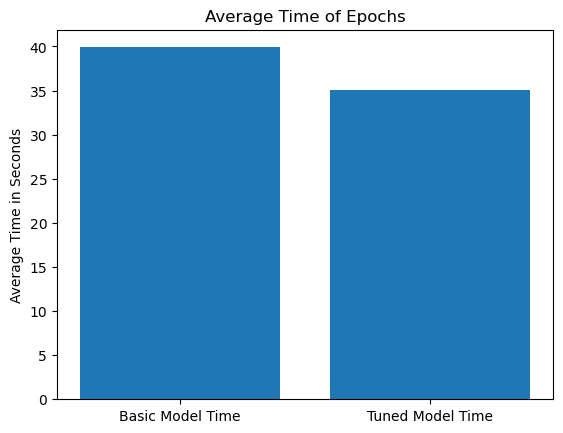

In [48]:
#Average time of epochs
plot_values(epoch_times, times, ylabel="Average Time in Seconds", title="Average Time of Epochs")

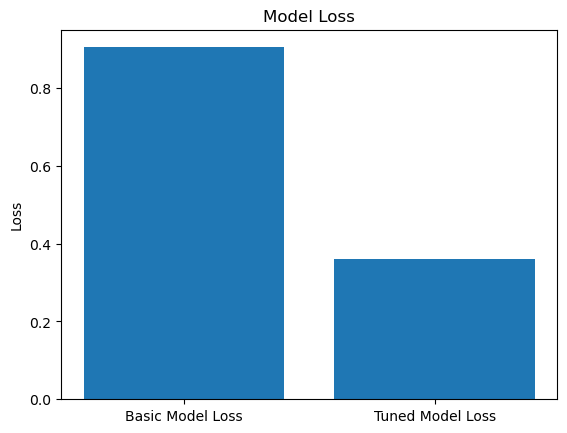

In [49]:
#Loss
plot_values(loss_value, losses, ylabel="Loss", title="Model Loss")

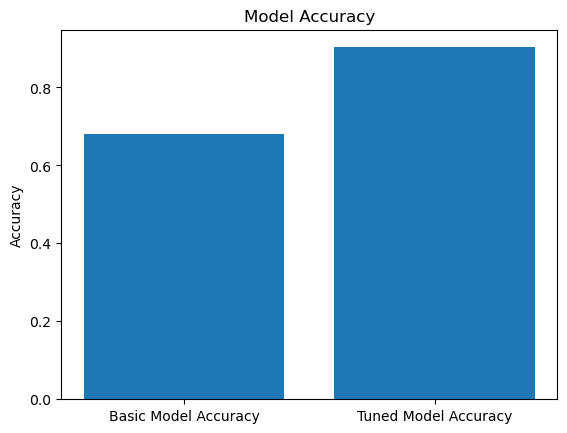

In [50]:
#Accuracy
plot_values(accuracy_values, accuracies, ylabel="Accuracy", title="Model Accuracy")

<h3>Confusion Matrix</h3>

In [51]:
#Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

313/313 [==============================] - 2s 6ms/step
Confusion Matrix, without Normalization


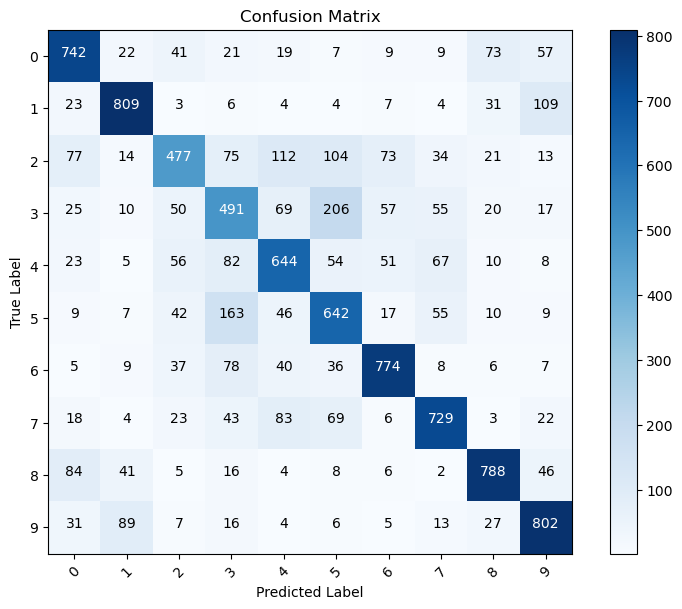

In [52]:
Y_pred = model.predict(X_valid)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_valid, axis=1)

plot_confusion_matrix(Y_true, Y_pred_classes, classes=range(n_classes), normalize=False)

<h3>Conclusions</h3>

<p>While the Tuned Model had twice the number of epochs in this run of the program, it took a shorter time per epoch on average. This is due to the better tuning on the number of filters in the Input Layer. In addition, both the Loss and Accuracy of the tuned model were better (lower and higher, respectively), with the Tuned Model's Accuracy reaching 90%.</p>

<p>In the Confusion Matrix, we can see that the model had some issues distinguishing cats and dogs (labels 3 and 5), but generally was clear on each prediction.</p>

<p>If I were to continue to work on this specific project, I would try adding more convolutional layers, to try to increase the accuracy, with a goal being 97% Accuracy. I would also like to possibly attempt to use the cifar100 dataset, but I might need a dedicated computer with a discrete gpu for that.</p>

<p>While preparing this midterm, I tried both Adam and SGD optimizers. Interestingly, the Adam optimizer provided better results on loss and accuracy. I found conflicting reports online, but the general concensus was that Adam is a worse performer for CNN tasks.</p>

<p>I ran into an issue with the model predictions at the end, and could not easily find a way to fix it. Any guidance would be appreciated.</p>

<p>I would like to thank my partner for the use of their computer for this assignment. It would have taken me much longer to actually run the code outside of testing if I had used my own.</p>